A demo of ANN for solving linear and non-linear functions with a single dependant variable predicted from multiple independant variables

*   Explore the established points: generate plots that show fitting with ANN is a function of the quantity of training data, the number of epochs, the hyper-parameters etc

*   Data for fitting by the ANN is generated using a configurable multivariate linear model or by a non-linear option involving squares, cubes and trigonomic functions

*   The code can also be changed easily to look at alternative model architectures starting with the single perceptron which does a fine job in estimating the parameters of a multi-variate linear model as expected

SeanVW, 2024

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from math import ceil, floor
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Number of samples
num_samples = 1000

# Generate predictable random values for features
np.random.seed(0)
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Calculate y using the multivariate linear model
# some constants for data generation

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

if (False):
  c0 = 1
  c1 = 1.2
  c2 = 2.4
  c3 = 3.9
  # the equation the get the label aka y
  label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * feature3)
  # a text label from data generation
  model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " X3".translate(SUB)
elif(True):
  c0 = 0
  c1 = 0
  c2 = 0
  c3 = 1
  # non-linear regression example
  label = c0 + (c1 * feature1) + (c2 * feature2)  + (c3 * (np.sin(feature3) + np.tan(feature3)))
  model_as_text =  "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " (sin(X3) + tan(X3))".translate(SUB)
else:
  c0 = 1
  c1 = 1.2
  c2 = 2.4
  c3 = 3.9
  # non-linear regression example
  label = c0 + (c1 * (feature1 ** 1)) + (c2 * (feature2 ** 2))  + (c3 * (feature3 ** 3))
  model_as_text = "y = " + str(c0) + " + " + str(c1) + " x1".translate(SUB) + "1".translate(SUP) + " + " + str(c2) + " x2".translate(SUB) + "2".translate(SUP) + " + " + str(c3) + " x3".translate(SUB) + "3".translate(SUP)

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'label': label
})
#print(data)

# Column to sort by, the label index
column_index = 3
print("\nSorted\n")
# Sort the array based on the specified column
data = data.sort_values(by='label')
# have a look at the generated data
print(data)


Sorted

     feature1  feature2  feature3     label
55   0.161310  0.232773  0.000074  0.000147
349  0.959433  0.686380  0.000903  0.001807
32   0.456150  0.943851  0.001595  0.003189
802  0.408303  0.968204  0.005052  0.010104
243  0.132068  0.151230  0.005495  0.010990
..        ...       ...       ...       ...
622  0.637583  0.506532  0.995830  2.382426
366  0.724168  0.956871  0.996100  2.383488
654  0.859581  0.671690  0.997046  2.387208
836  0.914863  0.599581  0.999949  2.398676
749  0.507636  0.270477  0.999964  2.398736

[1000 rows x 4 columns]


In [2]:
# pull the data frame apart
X = data[['feature1', 'feature2', 'feature3']].values
y = data['label'].values

# print some data points from X and y
# remember syntax of slicing is different to perl
print_n = 5
print("Showing " + str(print_n) + " data points")
print("X:\n")
print(X[:print_n])
print("")
print("X.shape[1] = " + str(X.shape[1]))
print("")
print("y:\n")
print(y[:print_n])

Showing 5 data points
X:

[[1.61309518e-01 2.32772672e-01 7.36994331e-05]
 [9.59433341e-01 6.86380230e-01 9.03285521e-04]
 [4.56150332e-01 9.43850857e-01 1.59457060e-03]
 [4.08302908e-01 9.68204391e-01 5.05187001e-03]
 [1.32068106e-01 1.51230225e-01 5.49481781e-03]]

X.shape[1] = 3

y:

[0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]


Set epochs_tup to  (1, 3, 5, 25, 50, 100, 200, 400, 1200)
epochs 1

Training loss begin: 0.7294517755508423
Training loss   end: 0.7294517755508423

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [0.3272275  0.78366673 0.7408972  0.7373605  0.28483713]
-----------------------------------------------------------
epochs 3



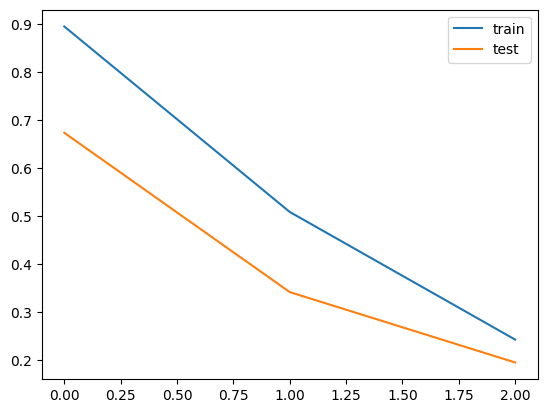

Training loss begin: 0.8952741026878357
Training loss   end: 0.24296674132347107

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [0.1908445  0.33839628 0.2904445  0.29853982 0.20748435]
-----------------------------------------------------------
epochs 5



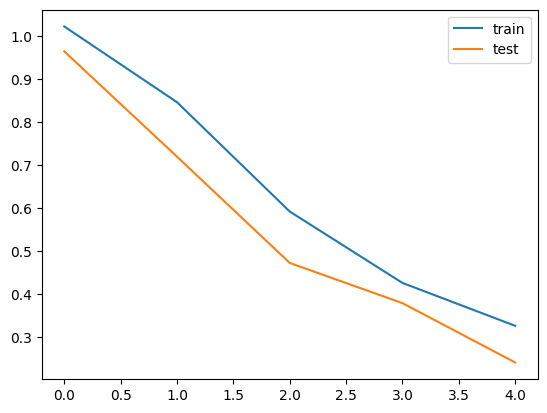

Training loss begin: 1.023237705230713
Training loss   end: 0.3264763653278351

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [0.26789728 0.42479572 0.39027914 0.39389345 0.26549673]
-----------------------------------------------------------
epochs 25



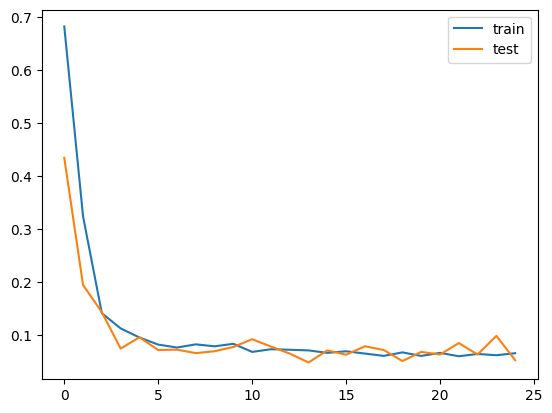

Training loss begin: 0.681989312171936
Training loss   end: 0.06573817878961563

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [-0.00821184 -0.00861895 -0.02051848 -0.02190106  0.00197737]
-----------------------------------------------------------
epochs 50



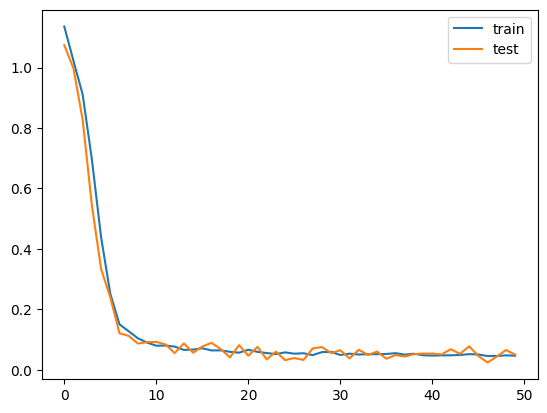

Training loss begin: 1.1359764337539673
Training loss   end: 0.04668385535478592

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [-0.04204619  0.00187033 -0.01493651 -0.00442255 -0.02982432]
-----------------------------------------------------------
epochs 100



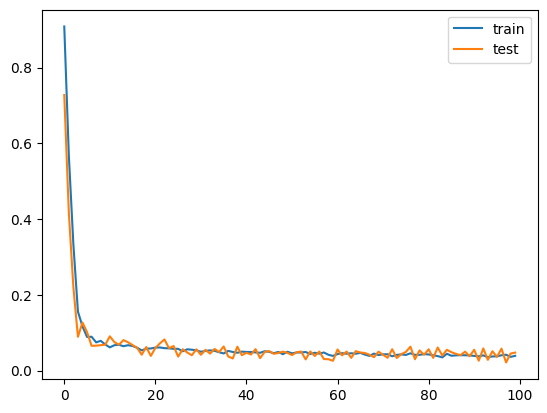

Training loss begin: 0.9086934924125671
Training loss   end: 0.038820236921310425

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [0.01911235 0.02319984 0.01517012 0.01502995 0.02109587]
-----------------------------------------------------------
epochs 200



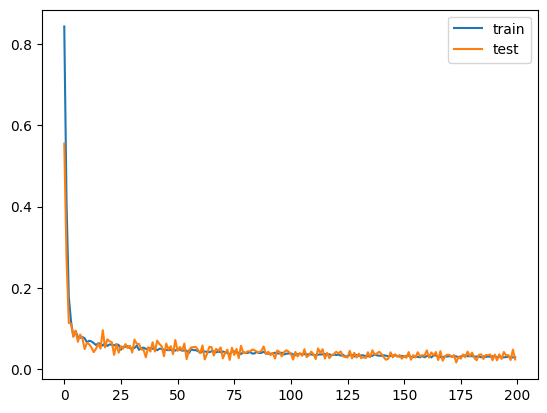

Training loss begin: 0.8439638018608093
Training loss   end: 0.02874927967786789

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [0.00537633 0.00711746 0.01411721 0.0134739  0.01148935]
-----------------------------------------------------------
epochs 400



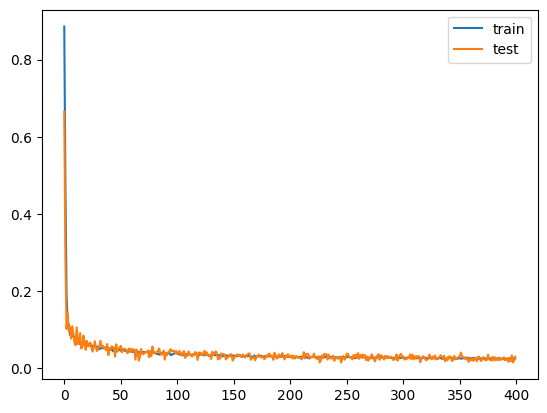

Training loss begin: 0.8857408761978149
Training loss   end: 0.02456454001367092

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [0.01666525 0.00611329 0.00843791 0.00706241 0.02059804]
-----------------------------------------------------------
epochs 1200



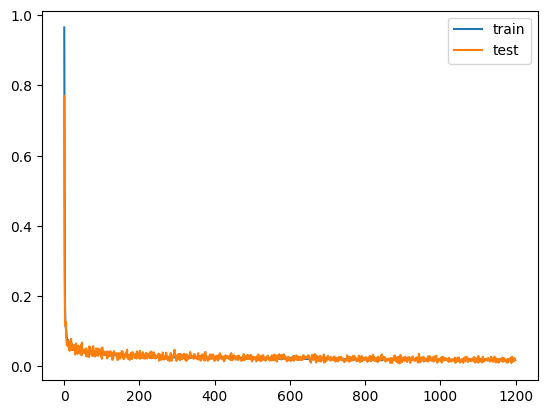

Training loss begin: 0.9650477766990662
Training loss   end: 0.018517859280109406

Showing  5  sample values..

          y:  [0.0001474  0.00180657 0.00318914 0.01010376 0.01098966]
predictions:  [1.7672405e-03 2.2869557e-05 2.4957396e-03 4.0509254e-03 8.4706396e-03]
-----------------------------------------------------------


In [3]:
# Create a list to store the plot data (axes)
series = []
titles = []

# Define the number of plots in the grid
# Number of rows and columns for the grid
epochs_tup = ()
if (False):
  epochs_tup = (1, 5, 50, 100)
  n_rows = 2
  n_cols = 2
elif (False):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 800)
  n_rows = 3
  n_cols = 3
elif (True):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 1200)
  n_rows = 3
  n_cols = 3
else:
  epochs_tup = (1, 25, 50, 100, 200, 800)
  n_rows = 2
  n_cols = 3

print("Set epochs_tup to ", epochs_tup)

num_plots = n_cols * n_rows

#print("type ", type(epochs_tup))
#print("length ", len(epochs_tup))

for epochs in (epochs_tup):

  print("epochs " + str(epochs))
  print("")
  #model_type = "2 Layer ANN"
  # model_type = "3 Layer ANN"
  # model_type = "4 Layer ANN"
  model_type = "5 Layer ANN"

  if (model_type == "2 Layer ANN"):
    model_desc = "2 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    # Create and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X.shape[1],))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
  elif (model_type == "3 Layer ANN"):
    model_desc = "3 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mae', optimizer='adam')
  elif (model_type == "5 Layer ANN"):
    # incomplete, attempt at non-linear regression
    model_desc = "5 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation="relu", input_dim=X.shape[1]))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(8, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    #model.compile(loss='mae', optimizer='adam')
    # Create the Adam optimizer with custom parameters
    adam_optimizer = tf.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.001 /200,
      amsgrad=False
    )

    model.compile(loss='mae', optimizer=adam_optimizer)

  # Patient early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400)


  # Split data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the model
  # batch_sizes 32, 64, 128, 256 to test - memory align efficiency
  batch_size = 64
  history = model.fit(X_train, y_train, epochs=epochs,
                      validation_data=(X_val, y_val), verbose=0, batch_size=batch_size, callbacks=[es])

  # Plot training history
  if (epochs > 1):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

  print("Training loss begin:", history.history['loss'][0])
  print("Training loss   end:", history.history['loss'][-1])
  print("")

  # Make predictions
  pred = model.predict(X, verbose = 0)

  # lets see some actual values and predictions
  # y is also (data['label'].values)
  p_n = 5
  print("Showing ", str(p_n), " sample values..\n")
  print("          y: ", y[:p_n])
  predictions = pred[:,0]
  print("predictions: ", predictions[:p_n])

  # get min and max of y and predictions for scale limits
  max_value = ceil(max(max(y),max(predictions)))
  min_value = floor(min(min(y),min(predictions)))
  ilist = list(range(min_value, max_value + 1))

  # Define the series to be added to each plot
  one_plot_data = [(y, predictions, 'Data points'), (ilist, ilist, 'Identity')]
  series.append(one_plot_data)
  titles.append(model_desc)

  print("-----------------------------------------------------------")

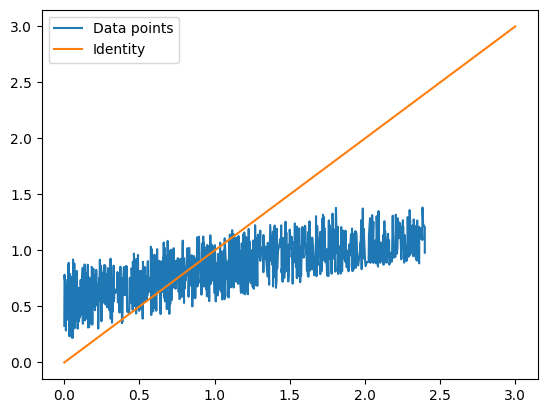

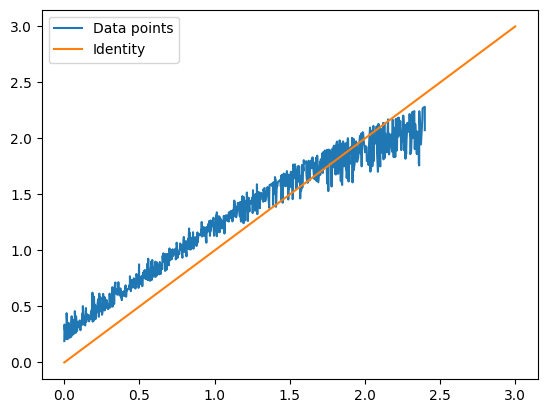

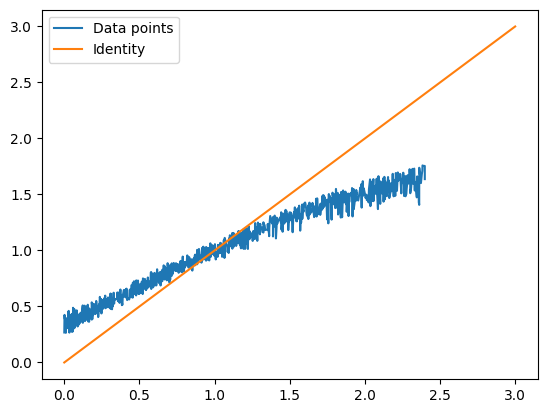

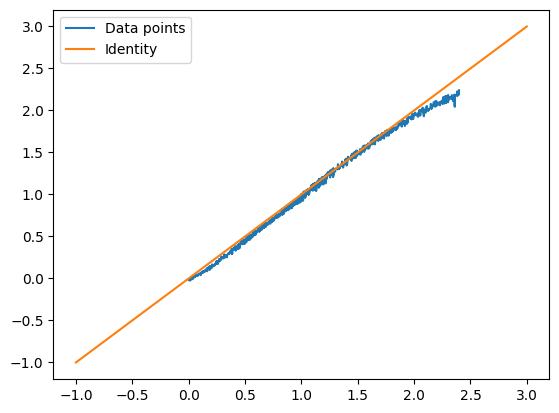

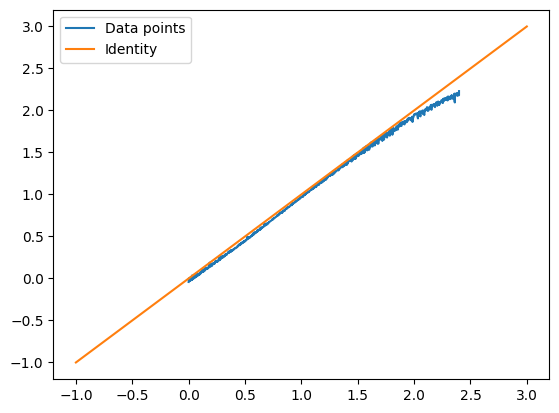

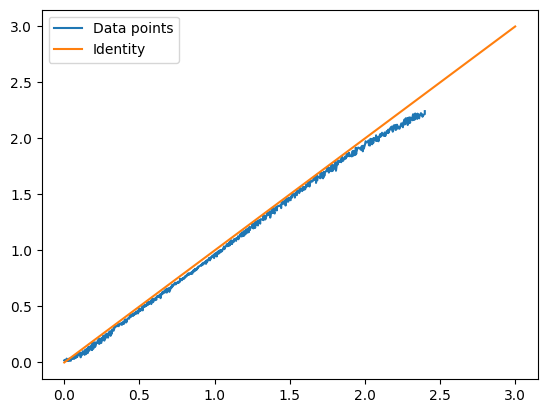

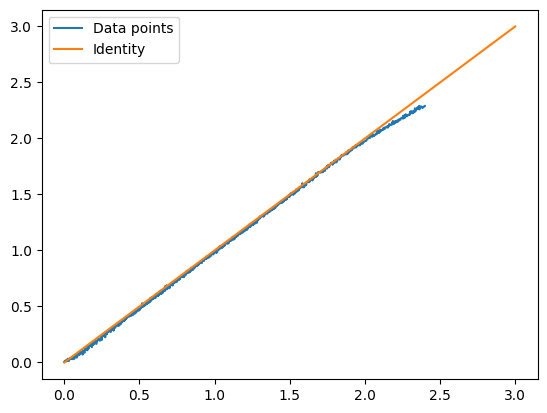

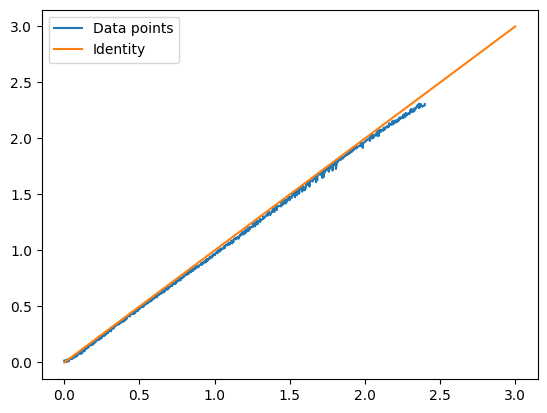

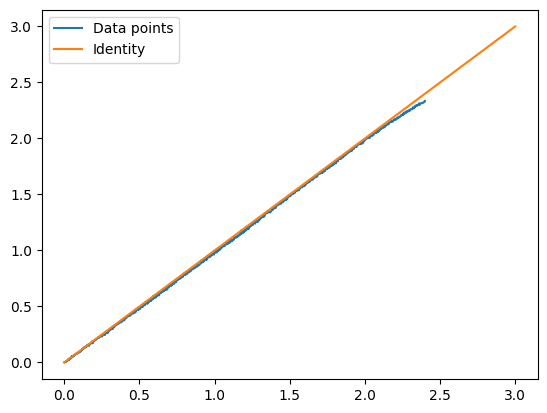

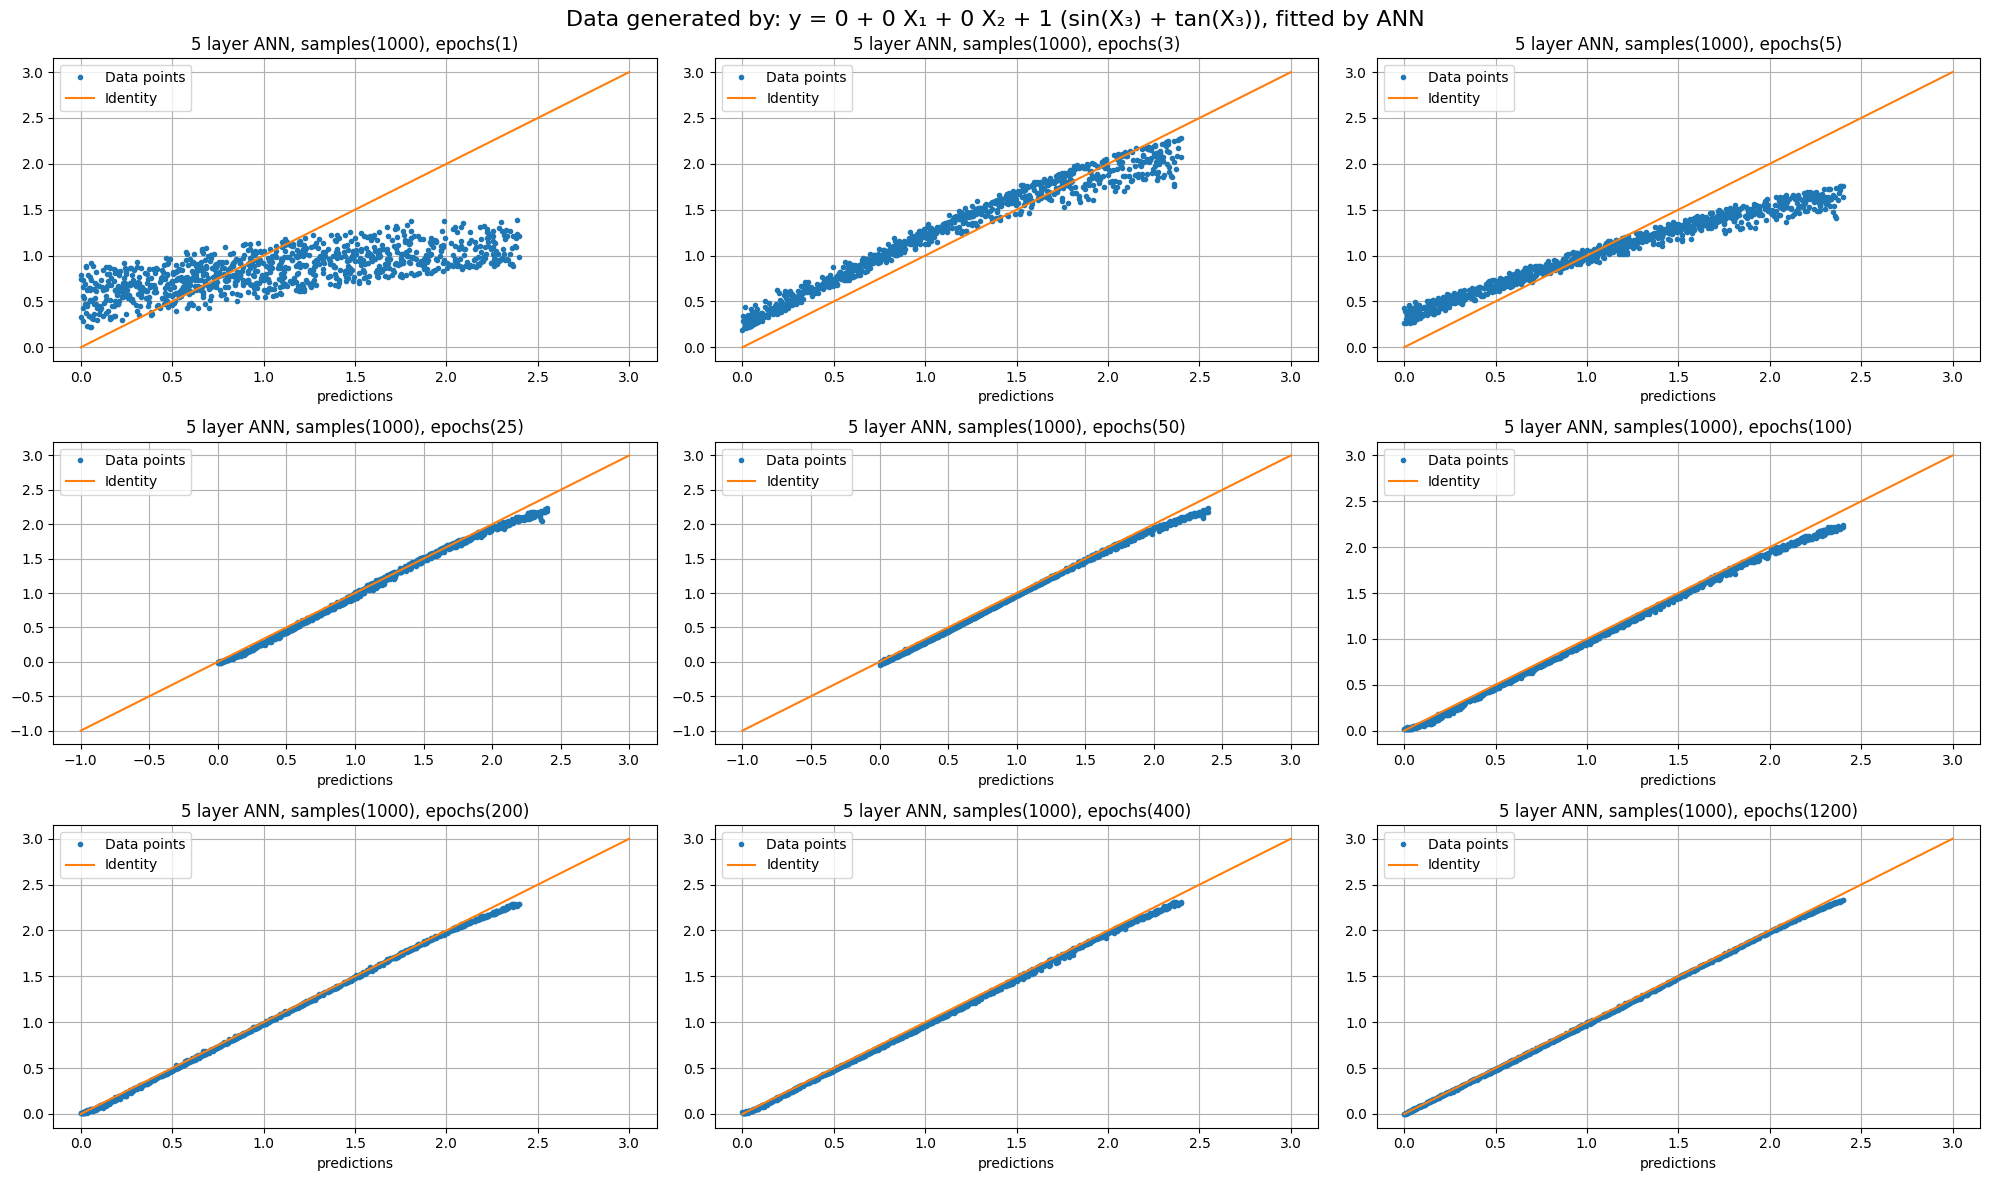

In [4]:
# Create a list to store the plot data (figure and axes)
plot_data = []

# Create plots in a loop
for series_set in series:
    fig, ax = plt.subplots()
    for x_data, y_data, label in series_set:
        ax.plot(x_data, y_data, label=label)
    ax.legend()
    plot_data.append((fig, ax))


# Create a new figure for the grid layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))

fig.suptitle('Data generated by: ' + model_as_text + ', fitted by ANN', fontsize=16)

# Flatten the axs array if necessary (in case of a single row or column)
if n_rows == 1 and n_cols == 1:
    axs = np.array([[axs]])

axs = axs.flatten()

# Loop over the plot_data array and plot in the grid
for i, (fig, ax) in enumerate(plot_data):
    for line in ax.get_lines():
        if (line.get_label() == 'Identity'):
          style = '-'
        else:
          style = '.'
        axs[i].plot(line.get_xdata(), line.get_ydata(), style, label=line.get_label())
    axs[i].legend()
    axs[i].set_xlabel('y')
    axs[i].set_xlabel('predictions')
    axs[i].set_title(titles[i])
    axs[i].grid(True)


# Adjust layout
plt.tight_layout()

# Display the grid of plots
#plt.show()
fig.show()

The model architecture


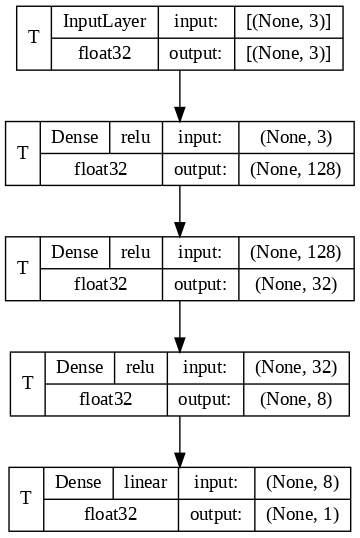

In [5]:
# Generate a plot of the model architecture
print("The model architecture")
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           show_dtype=True,
           expand_nested=True,
           dpi=100,
           show_layer_activations=True,
           show_trainable=True)

In [6]:

# Print model summary
model.summary()

# Total number of parameters
total_params = model.count_params()

# Total number of trainable parameters
trainable_params = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])

# Total number of non-trainable parameters
non_trainable_params = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])

print(f"Total params: {total_params}")
print(f"Trainable params: {trainable_params}")
print(f"Non-trainable params: {non_trainable_params}")

# Extract and print model weight
print("\n")
print("here are the weights: \n")
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    for i, weight in enumerate(weights):
        print(f"Weight {i + 1}:")
        print(weight)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               512       
                                                                 
 dense_33 (Dense)            (None, 32)                4128      
                                                                 
 dense_34 (Dense)            (None, 8)                 264       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4913 (19.19 KB)
Trainable params: 4913 (19.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Total params: 4913
Trainable params: 4913
Non-trainable params: 0.0


here are the weights: 

Layer: dense_32
Weight 1:
[[-1.93146378e-01  1.75731052e-0